# Discretization

In [23]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer

In [24]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [27]:
# as deck column contains many undefined or empty values so i droped it

df.isnull().sum()
# df = df.drop('deck',axis=1)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [29]:
# impute missing values
# print(df.isnull().sum())
df['age'] = df['age'].fillna(df['age'].median())
df['fare'] = df['fare'].fillna(df['fare'].median())
# print(df.isnull().sum())
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


<Axes: xlabel='age', ylabel='Count'>

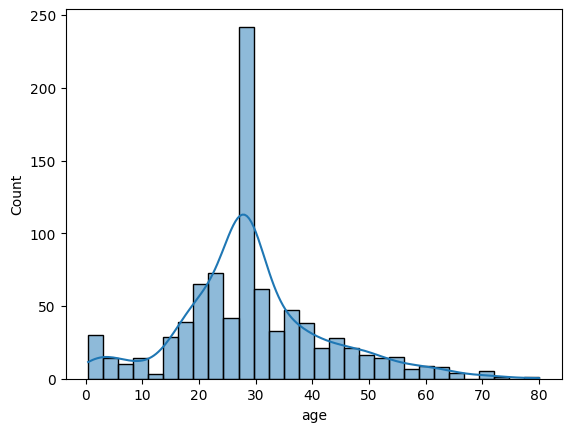

In [30]:
sns.histplot(df['age'],kde=True)

In [46]:
# age discretization

age_discretizer = KBinsDiscretizer(n_bins=2, encode="ordinal", strategy='uniform')
df["age_bin"] = age_discretizer.fit_transform(df[["age"]])
df.head()
df['age_bin'].value_counts()

age_bin
0.0    741
1.0    150
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='Count'>

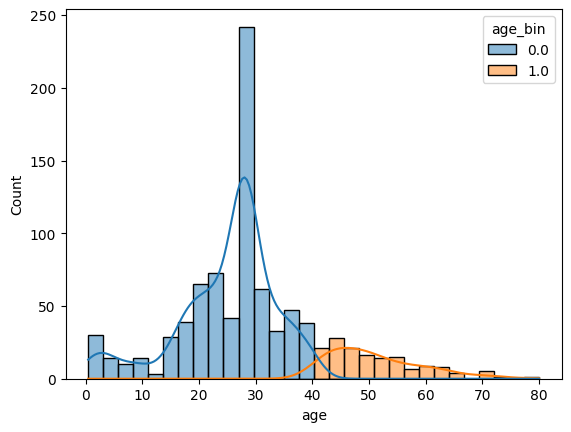

In [47]:
# sns.histplot(df['age_bin'],kde=True)
sns.histplot(df, x="age", hue="age_bin", kde=True)

<Axes: xlabel='age', ylabel='Count'>

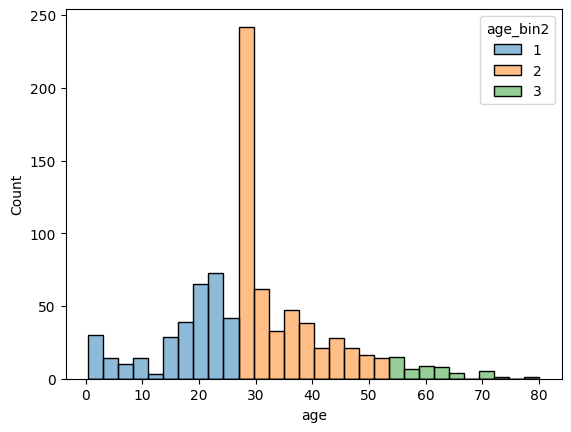

In [48]:
# pandas method for manual binng

df["age_bin2"] = pd.cut(df["age"], bins=3, labels=[1, 2, 3])
sns.histplot(df, x="age", hue="age_bin2")

<Axes: xlabel='age', ylabel='Count'>

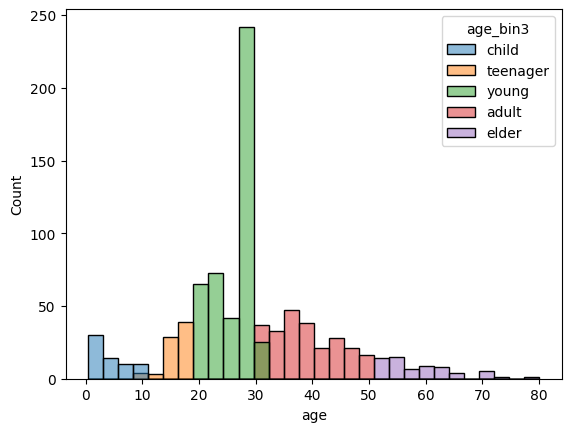

In [51]:
# manual labeling binng using pandas

bins_ranges = [0, 10, 18, 30, 50, 80]
labels = ["child", "teenager", "young", "adult", "elder"]
df["age_bin3"] = pd.cut(df["age"], bins=bins_ranges, labels=labels)
sns.histplot(df, x="age", hue="age_bin3")